In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the data
df = pd.read_csv("listings.csv")

In [3]:
# Check the structure
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27262,https://www.airbnb.com/rooms/27262,20250624032159,2025-06-26,previous scrape,"AQA-No7, Great mattress, high speed internet",THE MATTRESS - KING KOIL - Camden Luxury 160x2...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,37177,...,4.97,4.75,4.71,00002433111,t,1,1,0,0,0.19
1,33945,https://www.airbnb.com/rooms/33945,20250624032159,2025-06-24,city scrape,Spacious Cosy aprtm very close to Metro!,Apartment located near metro station. Safe nei...,Neighbourhood is alive all day and safe all da...,https://a0.muscache.com/pictures/1a7a1026-f5f1...,146553,...,4.90,4.64,4.81,00000874421,f,2,2,0,0,0.47
2,49489,https://www.airbnb.com/rooms/49489,20250624032159,2025-06-25,city scrape,Ermou 44 - 3bdr apt in the heart of Athens,"Fully furnished, 98 sq.mt., apartment on 44 Er...",The apartment is located at the commercial cen...,https://a0.muscache.com/pictures/9640239/4bfd2...,225612,...,4.87,4.88,4.69,00000876484,t,3,3,0,0,0.84
3,60394,https://www.airbnb.com/rooms/60394,20250624032159,2025-06-25,city scrape,Cosy apartment! Great central Athens location!,Fully furnished cozy apartment in the best nei...,Very centrally located with a feeling of a qui...,https://a0.muscache.com/pictures/477282/db550f...,290864,...,4.97,4.91,4.94,00000508830,f,1,1,0,0,0.29
4,134340,https://www.airbnb.com/rooms/134340,20250624032159,2025-06-25,city scrape,Neo Pagrati Athens Apartment,Little gem with the best of all worlds! Locate...,Our street is a small one with very little tra...,https://a0.muscache.com/pictures/1232312/4edeb...,659406,...,4.93,4.55,4.83,00002821300,f,1,1,0,0,0.36


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15632 entries, 0 to 15631
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15632 non-null  int64  
 1   listing_url                                   15632 non-null  object 
 2   scrape_id                                     15632 non-null  int64  
 3   last_scraped                                  15632 non-null  object 
 4   source                                        15632 non-null  object 
 5   name                                          15632 non-null  object 
 6   description                                   15283 non-null  object 
 7   neighborhood_overview                         7613 non-null   object 
 8   picture_url                                   15632 non-null  object 
 9   host_id                                       15632 non-null 

In [5]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.563200e+04,1.563200e+04,1.563200e+04,15073.000000,15073.000000,0.0,15632.000000,15632.000000,15632.000000,14849.000000,...,13122.000000,13122.000000,13122.000000,13122.000000,13122.000000,15632.000000,15632.000000,15632.000000,15632.000000,13123.000000
mean,7.381334e+17,2.025062e+13,2.774046e+08,33.848736,46.697870,NaN,37.979763,23.731546,3.694537,1.199811,...,4.776709,4.858355,4.860702,4.692284,4.726441,17.476714,16.253135,1.151100,0.019639,1.699604
std,5.458343e+17,1.890685e+00,2.151012e+08,91.816743,169.207652,NaN,0.013101,0.012309,1.934081,0.535836,...,0.383387,0.306338,0.331001,0.431265,0.396818,29.709934,28.718851,4.454255,0.333160,1.720865
min,2.726200e+04,2.025062e+13,3.717700e+04,1.000000,1.000000,NaN,37.949625,23.700809,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.551375e+07,2.025062e+13,7.745789e+07,2.000000,2.000000,NaN,37.968907,23.724100,2.000000,1.000000,...,4.720000,4.850000,4.860000,4.590000,4.670000,1.000000,1.000000,0.000000,0.000000,0.400000
50%,9.166805e+17,2.025062e+13,2.215346e+08,7.000000,8.000000,NaN,37.978470,23.729780,4.000000,1.000000,...,4.890000,4.940000,4.960000,4.820000,4.830000,5.000000,4.000000,0.000000,0.000000,1.080000
75%,1.207905e+18,2.025062e+13,4.864266e+08,30.000000,34.000000,NaN,37.987250,23.737092,4.000000,1.000000,...,5.000000,5.000000,5.000000,4.970000,4.930000,18.000000,17.000000,0.000000,0.000000,2.490000
max,1.449435e+18,2.025062e+13,7.022443e+08,1605.000000,8733.000000,NaN,38.030830,23.780220,16.000000,12.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,168.000000,153.000000,40.000000,8.000000,16.980000


In [6]:
df.isnull().sum().sort_values(ascending=False)

neighbourhood_group_cleansed                    15632
calendar_updated                                15632
host_neighbourhood                               9917
host_about                                       8034
neighbourhood                                    8019
                                                ...  
instant_bookable                                    0
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
Length: 79, dtype: int64

In [7]:
df.shape

(15632, 79)

## **DATA CLEANING AND ANALYSIS**

We can drop the columns that most or even all of their values are NaN

In [8]:
 df.drop(['neighbourhood_group_cleansed','calendar_updated','host_neighbourhood','host_about'], axis=1, inplace=True)

In [9]:
#We are going to see if we have any duplicate values that we have to either change or drop
df.duplicated().sum()

np.int64(0)

In [10]:
# We are going to review the column price and see if does have the right type

In [11]:
df['price'].dtype

dtype('O')

In [12]:
#As we see it has an object type so we are going to change it to float

In [13]:
# But first, we are going to replace some values of this column and clean it
df['price'].unique()

array([nan, '$35.00', '$160.00', '$50.00', '$39.00', '$70.00', '$56.00',
       '$51.00', '$465.00', '$897.00', '$80.00', '$83.00', '$105.00',
       '$86.00', '$63.00', '$111.00', '$72.00', '$53.00', '$52.00',
       '$129.00', '$34.00', '$67.00', '$68.00', '$85.00', '$120.00',
       '$54.00', '$112.00', '$332.00', '$41.00', '$28.00', '$60.00',
       '$76.00', '$128.00', '$69.00', '$73.00', '$181.00', '$183.00',
       '$84.00', '$147.00', '$119.00', '$87.00', '$99.00', '$101.00',
       '$40.00', '$55.00', '$38.00', '$15.00', '$106.00', '$125.00',
       '$194.00', '$135.00', '$46.00', '$151.00', '$132.00', '$124.00',
       '$78.00', '$1,304.00', '$45.00', '$75.00', '$49.00', '$164.00',
       '$1,050.00', '$144.00', '$66.00', '$152.00', '$47.00', '$88.00',
       '$95.00', '$42.00', '$65.00', '$43.00', '$108.00', '$22.00',
       '$97.00', '$110.00', '$281.00', '$59.00', '$100.00', '$79.00',
       '$61.00', '$273.00', '$145.00', '$31.00', '$169.00', '$190.00',
       '$48.00', '

In [14]:
df['price'] = df['price'].str.replace('$','')

In [15]:
#In prices above 1000 the value includes a comma (',') so we are going to delete it
df['price'] = df['price'].str.replace(',','')

In [16]:
#We are going to change to the right type

In [17]:
df['price'] = df['price'].astype(float)

In [18]:
df['price'].dtype

dtype('float64')

In [19]:
#We are going to see how the Price is distributed and exclude the outliers

In [20]:
df.sort_values(by='price', ascending=False)[['price']].head()

,price
9671,38000.0
12931,13680.0
12488,10007.0
249,10000.0
15480,9999.0


<Axes: >

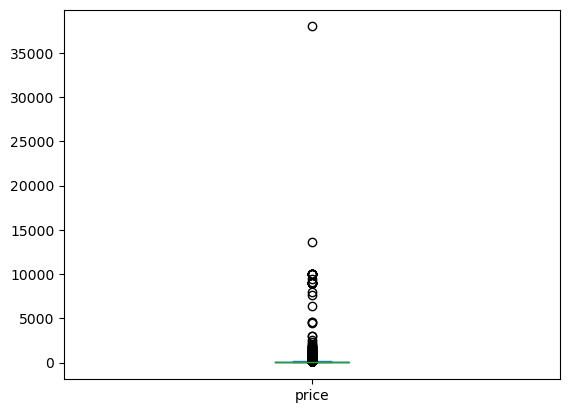

In [21]:
df['price'].plot(kind='box')

Text(0, 0.5, 'Frequency')

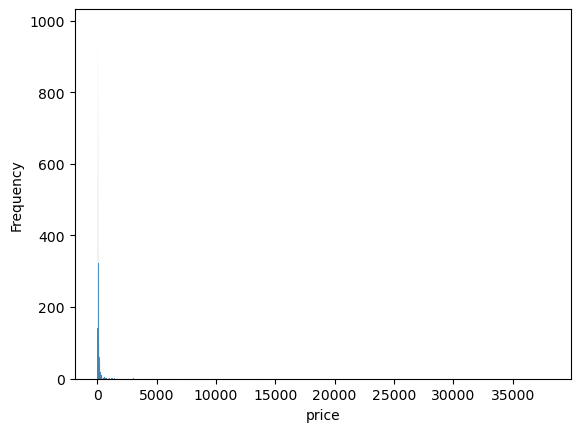

In [22]:
sns.histplot(data=df, x='price')
plt.ylabel('Frequency')

we cannot understand much from this plot so we will make it look better

In [23]:
len(df[df['price']>=1000])

70

In [24]:
df['price'].isnull().sum()

np.int64(781)

In [25]:
df.shape

(15632, 75)

In [26]:
df = df[df['price'] < 1000]

In [27]:
df.shape

(14781, 75)

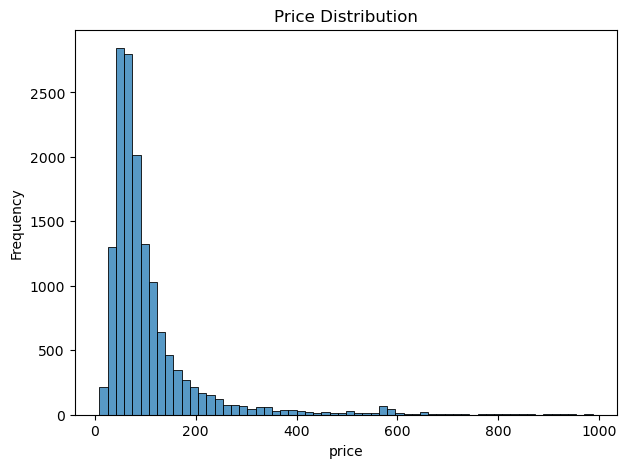

In [28]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='price', bins=60)
plt.title('Price Distribution')
plt.ylabel('Frequency')
plt.show()

In [29]:
#We will check if latitude has the correct type
df['latitude'].dtype

dtype('float64')

In [30]:
#Now we will see how many null values does it have so we can exclude them if there is any
df['latitude'].isnull().sum()

np.int64(0)

In [31]:
df['longitude'].dtype

dtype('float64')

In [32]:
df['latitude'].isnull().sum()

np.int64(0)

In [33]:
df[['longitude','longitude']].head(20)

,longitude,longitude
1,23.727750,23.727750
2,23.730640,23.730640
3,23.740380,23.740380
4,23.749680,23.749680
5,23.733230,23.733230
6,23.729060,23.729060
7,23.724320,23.724320
8,23.724790,23.724790
9,23.743110,23.743110
10,23.742920,23.742920


In [34]:
df['room_type'].head(10)

1     Entire home/apt
2     Entire home/apt
3     Entire home/apt
4     Entire home/apt
5     Entire home/apt
6     Entire home/apt
7     Entire home/apt
8     Entire home/apt
9     Entire home/apt
10    Entire home/apt
Name: room_type, dtype: object

In [35]:
# We will see all the different types of rooms
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [36]:
len(df['room_type'])

14781

In [37]:
len(df[df['room_type'] == 'Entire home/apt'])

13778

In [38]:
len(df[df['room_type'] == 'Private room'])

925

In [39]:
len(df[df['room_type'] == 'Shared room'])

30

In [40]:
len(df[df['room_type'] == 'Hotel room'])

48

<Axes: xlabel='room_type', ylabel='count'>

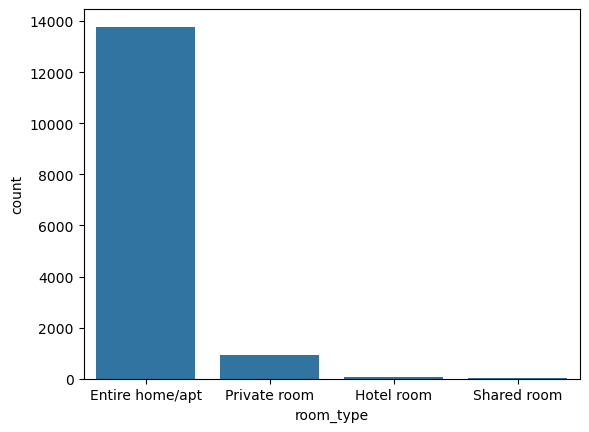

In [41]:
# Through this plot we will see which type of rooms we see the most and which the least
sns.countplot(data=df, x='room_type')

In [42]:
df['minimum_nights'].value_counts()

minimum_nights
1      6672
2      5567
3      1607
4       248
5       216
7       118
30       80
6        48
10       38
15       33
20       21
14       19
60       17
28       12
8        11
120       9
90        9
25        6
61        6
9         5
31        5
365       4
59        4
12        3
18        2
27        2
100       2
17        2
21        2
240       2
11        1
444       1
22        1
250       1
19        1
88        1
200       1
201       1
29        1
40        1
62        1
Name: count, dtype: int64

In [44]:
len(df[df['number_of_reviews'] == 0])

2250

In [45]:
df.sort_values(by='number_of_reviews', ascending =False)[['number_of_reviews']]

,number_of_reviews
97,1002
288,986
677,936
747,905
725,900
...,...
15555,0
15554,0
15553,0
15552,0


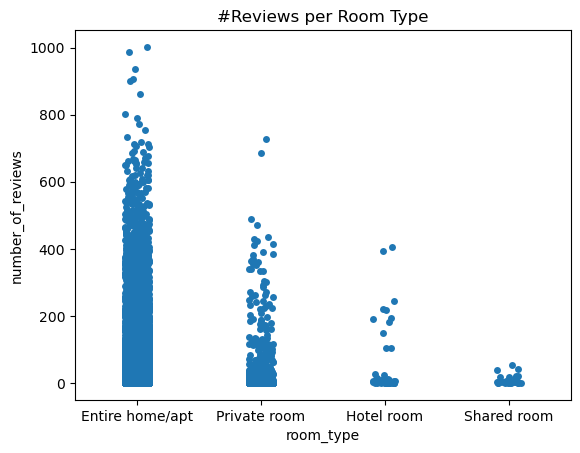

In [46]:
sns.stripplot(data=df, x="room_type", y="number_of_reviews")
plt.title('#Reviews per Room Type')
plt.show()

<Axes: xlabel='minimum_nights'>

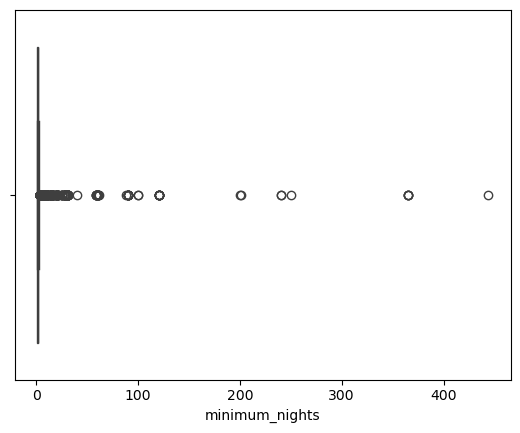

In [47]:
sns.boxplot(data=df,x='minimum_nights')

In [48]:
len(df[df['minimum_nights'] > 99])

21

In [49]:
#We will drop the outliers
df = df[df['minimum_nights'] <= 99]

In [50]:
df['availability_365'].value_counts()

availability_365
365    314
364    253
360    163
363    155
361    150
      ... 
10       6
5        5
19       5
18       3
8        3
Name: count, Length: 366, dtype: int64

In [51]:
len(df[df['availability_365'] == 0])

117

In [52]:
df['host_is_superhost'].unique()

array(['f', 't', nan], dtype=object)

In [54]:
# Replace the values to True and False
df['host_is_superhost'] = df['host_is_superhost'].str.replace('f','False').str.replace('t','True')

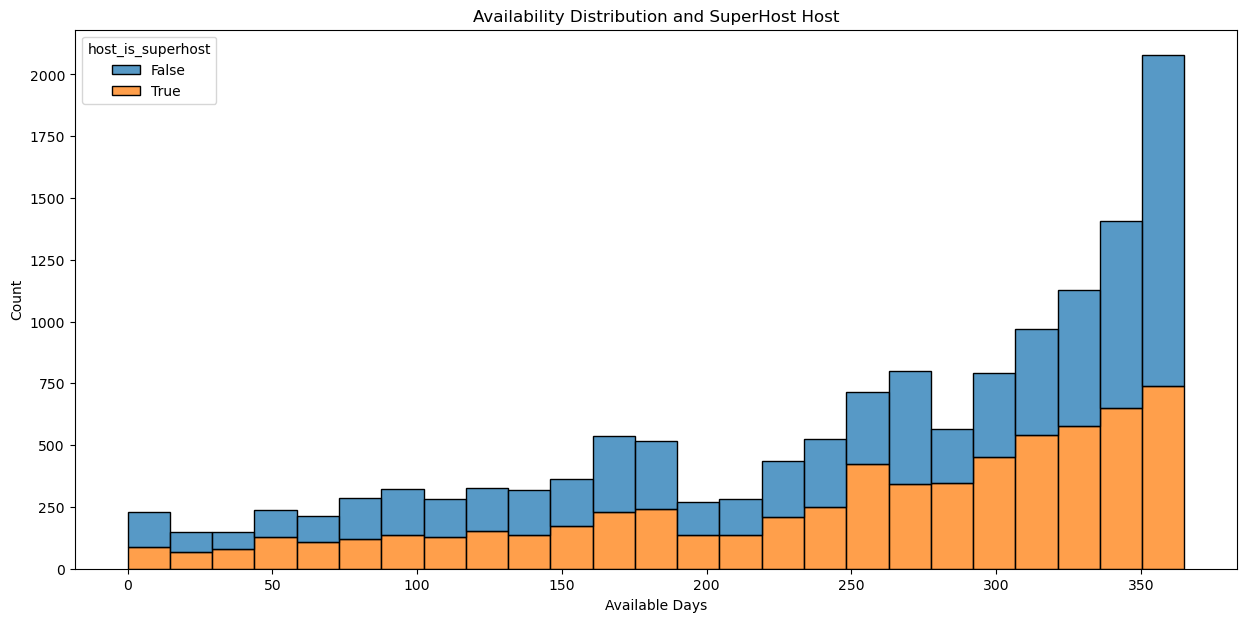

In [55]:
plt.figure(figsize=(15,7))
sns.histplot(data=df, x='availability_365', hue='host_is_superhost', multiple='stack',bins=25)
plt.title('Availability Distribution and SuperHost Host')
plt.xlabel('Available Days')
plt.show()

In [56]:
len(df[df['review_scores_rating'].isnull()])

2246

In [57]:
#We will see which 10 ratings are the most common
df['review_scores_rating'].value_counts().head(10)

review_scores_rating
5.00    3033
4.88     335
4.83     319
4.67     309
4.91     303
4.86     300
4.89     300
4.90     298
4.92     297
4.94     295
Name: count, dtype: int64

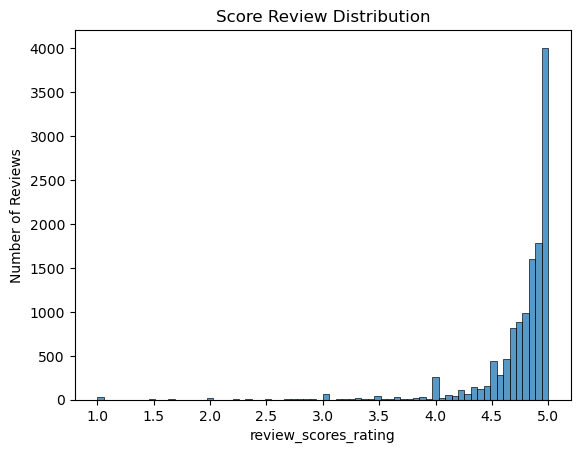

In [58]:
#We will create a plot to see the score review distribution
sns.histplot(data=df,x='review_scores_rating', bins=70)
plt.title('Score Review Distribution')
plt.ylabel('Number of Reviews')
plt.show()

In [59]:
df.shape

(14760, 75)

In [60]:
#Checking if there is a duplicate Id to remove it
df['id'].nunique()

14760

In [61]:
df['bedrooms'].value_counts(ascending=False)

bedrooms
1.0     8975
2.0     3842
3.0      824
0.0      817
4.0      182
5.0       55
6.0       36
8.0        7
7.0        4
11.0       2
10.0       2
12.0       2
Name: count, dtype: int64

In [62]:
#Checking bedrooms type
df['bedrooms'].dtype

dtype('float64')

In [63]:
df['bedrooms'].unique()

array([ 2.,  3.,  1.,  0.,  4.,  6.,  8.,  5.,  7., 11., 10., nan, 12.])

In [64]:
# Removing null values from bedrooms
df = df.dropna(subset='bedrooms')

In [65]:
#Converting bedrooms from float to int
df['bedrooms'] = df['bedrooms'].astype(int)

In [66]:
#Dropping the outliers
df = df[df['bedrooms'] <=6]

In [67]:
df['bathrooms'].value_counts(ascending=False)

bathrooms
1.0    11793
2.0     1296
1.5     1081
3.0      211
2.5      149
3.5       47
0.0       42
4.0       42
0.5       33
5.0       13
4.5       12
6.0        5
5.5        2
Name: count, dtype: int64

In [69]:
df['bedrooms'].unique()

array([2, 3, 1, 0, 4, 6, 5])

In [68]:
df['bathrooms'].unique()

array([1. , 1.5, 2. , 3.5, 2.5, 3. , 0. , nan, 0.5, 5.5, 4.5, 4. , 6. ,
       5. ])

In [70]:
df = df.dropna(subset=['bathrooms'])

In [71]:
df['bathrooms'] = df['bathrooms'].astype(int)

In [72]:
df['bathrooms'].dtype

dtype('int64')

In [73]:
df = df[df['bathrooms'] <= 5]

In [74]:
df['bathrooms'].unique()

array([1, 2, 3, 0, 5, 4])

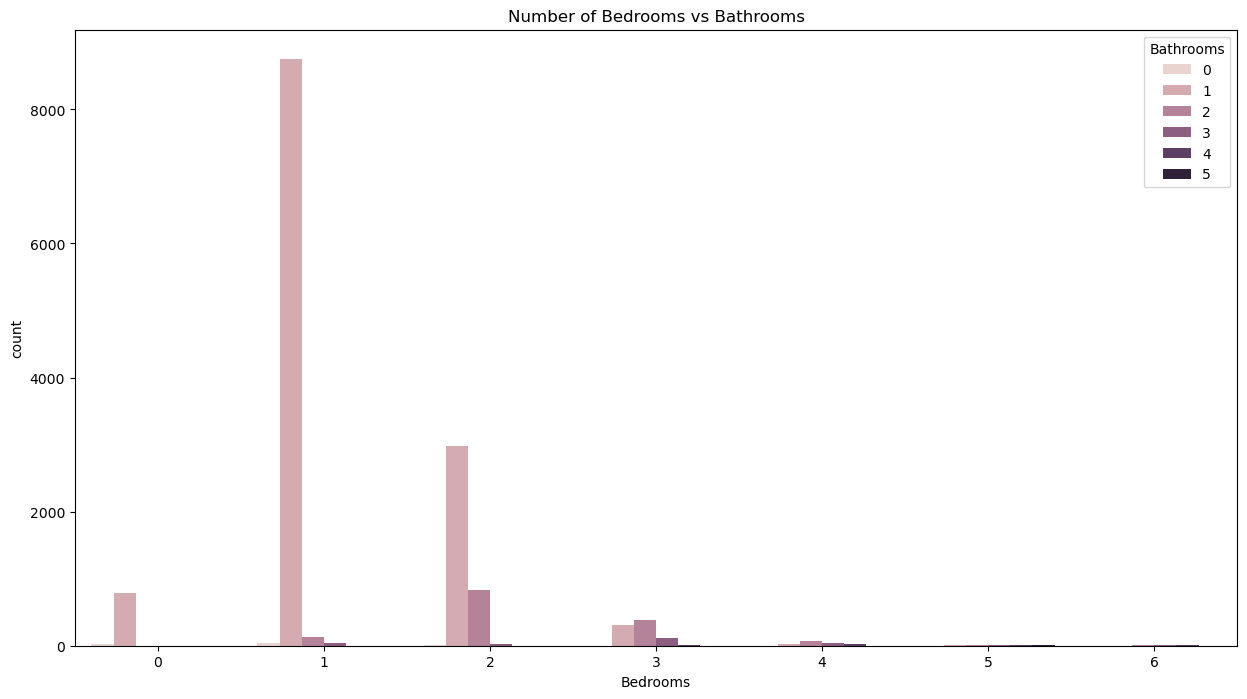

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='bedrooms', hue='bathrooms')
plt.title('Number of Bedrooms vs Bathrooms')
plt.xlabel('Bedrooms')
plt.legend(title='Bathrooms')
#plt.tight_layout()
plt.show()

In [76]:
#We will calculate the average price per bedrooms
df.groupby(by='bedrooms')['price'].mean()

bedrooms
0     83.164015
1     89.419955
2    115.816242
3    193.752427
4    314.967033
5    314.555556
6    363.312500
Name: price, dtype: float64

In [77]:
# Average price per room_type
df.groupby(by='room_type')['price'].mean()

room_type
Entire home/apt    106.970526
Hotel room         205.127660
Private room        88.104510
Shared room         41.083333
Name: price, dtype: float64

In [78]:
#Average beds per bedroom
df.groupby(by='bedrooms')['beds'].mean()

bedrooms
0    1.339088
1    1.452038
2    2.677083
3    3.947816
4    5.494505
5    6.981481
6    9.406250
Name: beds, dtype: float64

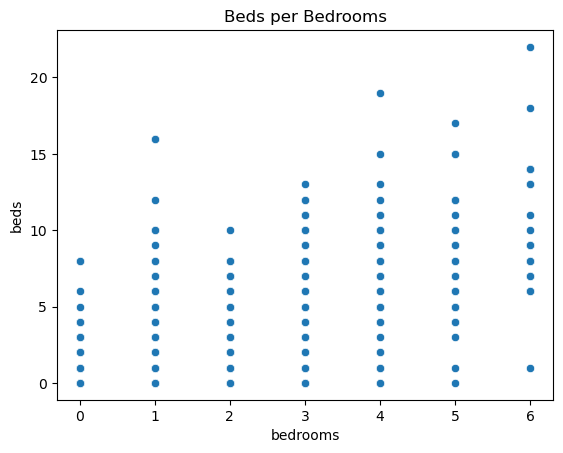

In [86]:
sns.scatterplot(data=df, x='bedrooms', y='beds')
plt.title('Beds per Bedrooms')
plt.show()

In [80]:
#We will create a new column to calculate the price of each bed in every airbnb
df['price_per_bed'] = df['price']/df['beds']

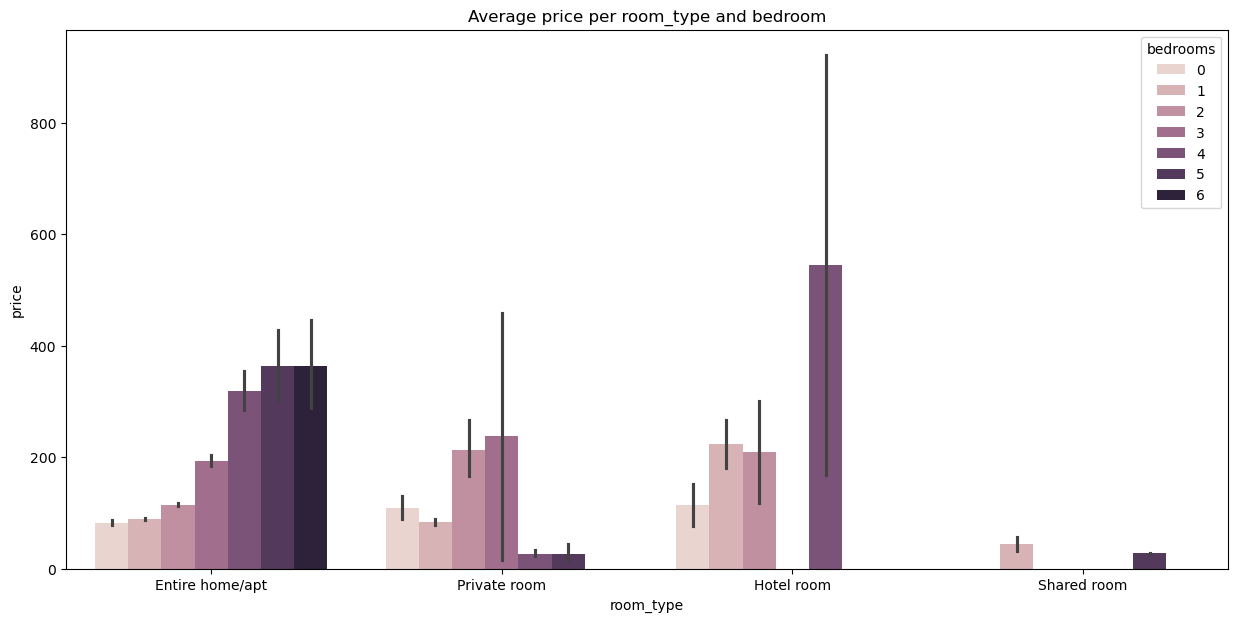

In [81]:
plt.figure(figsize=(15,7))
sns.barplot(data=df, x='room_type', y='price', hue='bedrooms')
plt.title('Average price per room_type and bedroom')
plt.show()

**Now we are going to create a pair plot with some of the most important columns of our dataframe**

In [82]:
# Few of the most important columns are:
# price
# room_type
# bedrooms
# minimum_nights
# maximum_nights
# availability_365
# number_of_reviews_ltm
# review_scores_rating

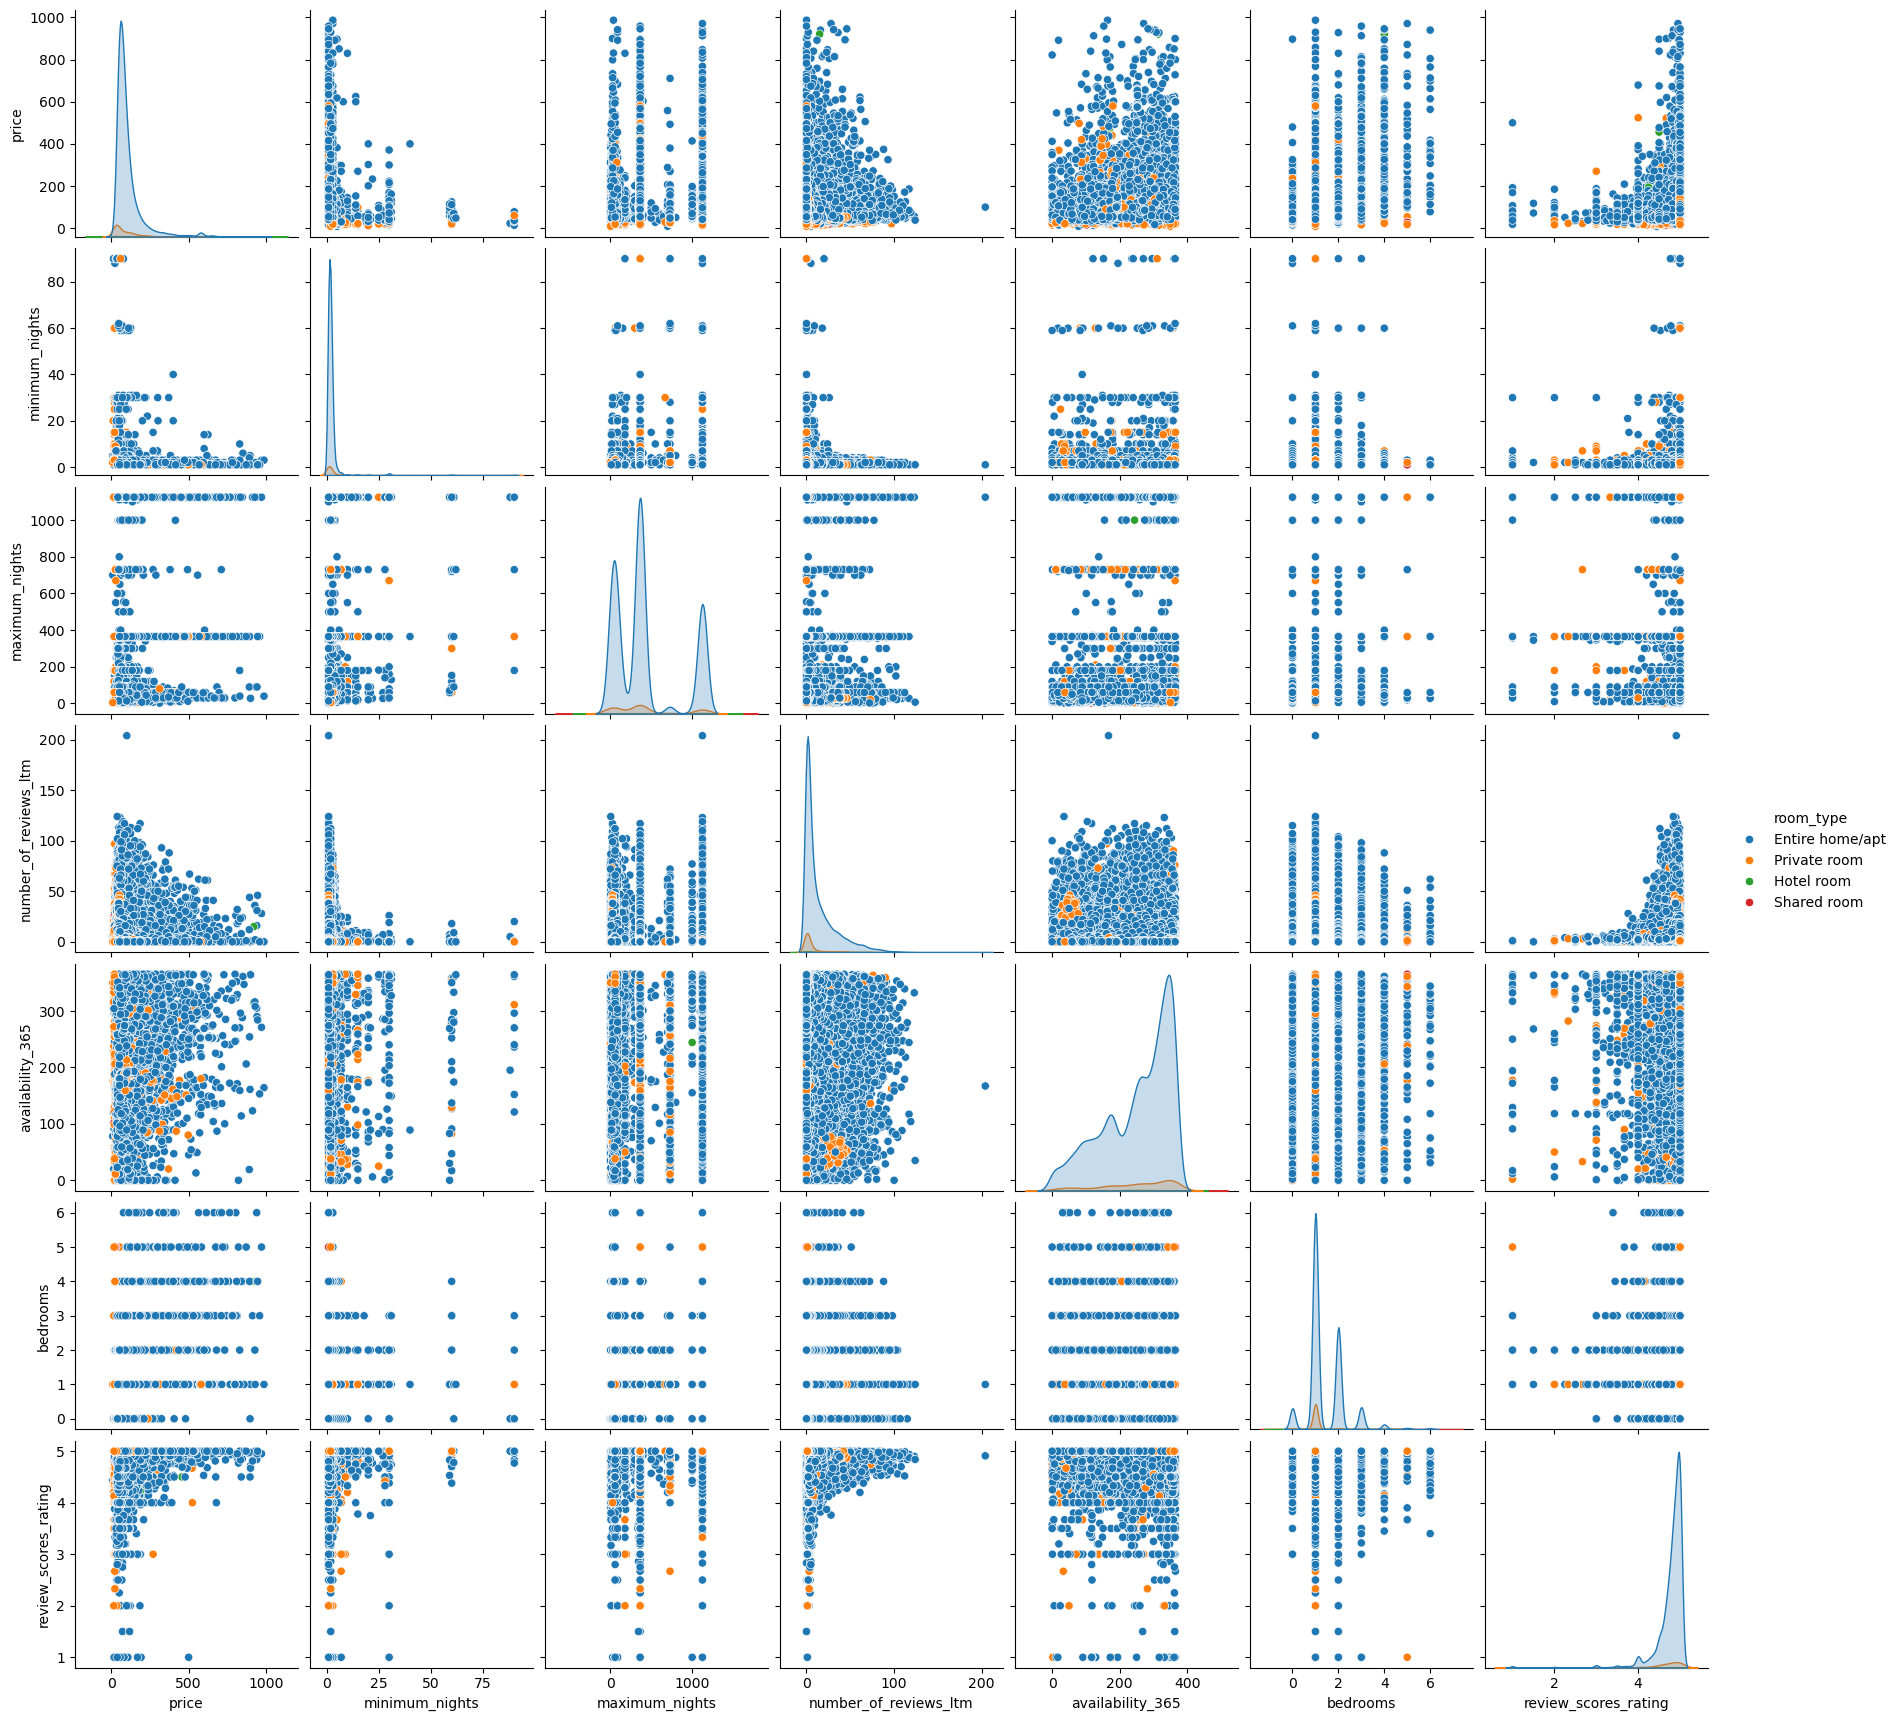

In [83]:
sns.pairplot(data=df, vars=['price','minimum_nights','maximum_nights','number_of_reviews_ltm','availability_365','bedrooms','review_scores_rating'], hue='room_type')
plt.show()

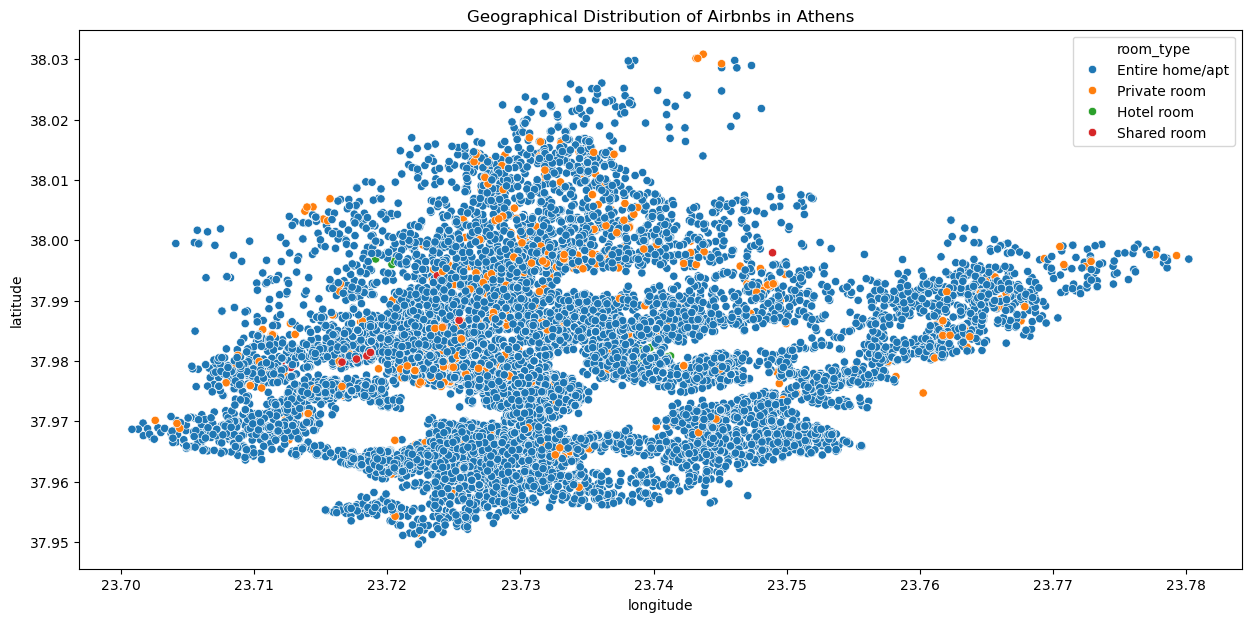

In [84]:
#Geographical Distribution of Airbnb's in Athens
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type')
plt.title('Geographical Distribution of Airbnbs in Athens')
plt.show()

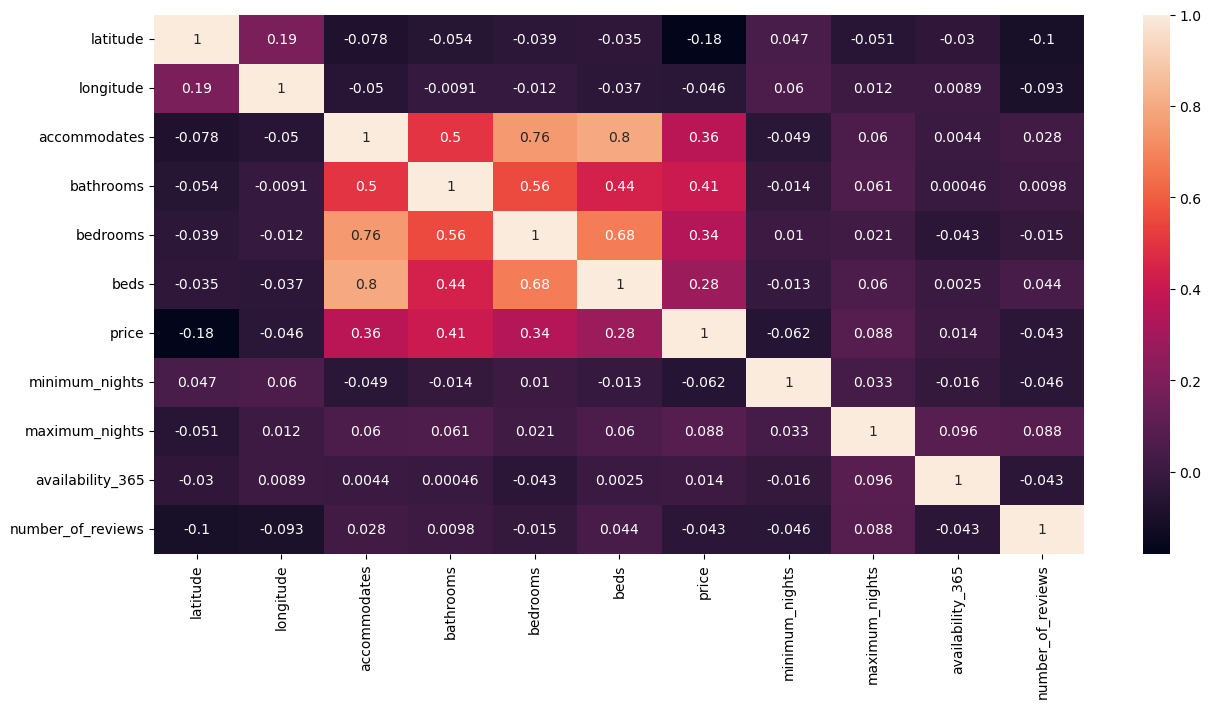

In [85]:
#het map - correlation of one variable with other for numerical columns

corr= df[['latitude','longitude','accommodates','bathrooms','bedrooms','beds','price','minimum_nights','maximum_nights','availability_365','number_of_reviews']].corr()
plt.figure(figsize=(15,7))
sns.heatmap(data=corr, annot=True)
plt.show()

In [92]:
#Lastly we will see the price per airbnb in real world map
import folium

map = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=11)
for _, row in df.sample(200).iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.3,
        popup=f"${row['price']}"
    ).add_to(map)

map
